#Instrucciones.

Identificar un problema real que pueda ser abordado con
técnicas de aprendizaje no supervisado.

Aplicar las temáticas del curso para analizar y encontrar patrones o estructuras
dentro de un conjunto de datos.

##Contexto de la base de datos:

PromptCloud extrajo 400.000 reseñas de teléfonos móviles desbloqueados vendidos en Amazon.com para obtener información sobre reseñas, valoraciones, precios y sus relaciones.

Nombre de las columnas:

- Product Title
- Brand
- Price
- Rating
- Review text
- Number of people who found the review helpful

## Problematica:

Con está base de datos queremos saber, qué marcas compran los consumirores según el Rewiewn. Además, queremos conocer cuál es el sentimiento que tiene los consumidores al momento de comprar en Amazon

## Primer punto:

Limpieza de datos: Se debe realizar una limpieza de datos como selección de
variables relevantes, eliminación o imputación de datos inconsistentes, atípicos o
faltantes.

In [68]:
#Se procede a cargar las librerías necesarias
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate

from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [69]:
#Se procede a cargar la base de datos
datos = pd.read_csv('/content/gdrive/MyDrive/Aprendizaje no supervisador para el analisis de datos /Bases de datos/Amazon_Unlocked_Mobile.csv')
datos.head()
datos.dropna(inplace=True)

In [70]:
datos_muestra = datos.sample(n=1000, random_state=45)
datos_muestra.head()
datos_muestra.isnull().sum()

,0
Product Name,0
Brand Name,0
Price,0
Rating,0
Reviews,0
Review Votes,0


In [71]:
# Descargar stopwords
nltk.download('stopwords')
stop_words_nltk_en = list(set(nltk.corpus.stopwords.words('english')))
stop_words_nltk_en = ["u", "c", "vp", "live", "end", "real", "nan", "w", "far", "real", "let", "g", "att", *stop_words_nltk_en]

# Función para limpiar el texto
def texto_limpio(texto):
    texto = texto.lower()  # Pasar a minúsculas
    texto = re.sub(r'http\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'[^A-Za-z\s]', '', texto)  # Eliminar símbolos
    tokens = texto.split()  # Tokenización
    tokens = [w for w in tokens if w not in stop_words_nltk_en]  # Eliminar stop words
    return ' '.join(tokens)

# Crear la columna de texto limpio
datos_muestra['texto_limpio'] = datos_muestra['Reviews'].apply(texto_limpio)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
datos_muestra['texto_limpio'].value_counts()

,count
texto_limpio,
good,22
excellent,16
excelente,14
ok,9
great,8
...,...
took calls get thing fully functional net service sim card wifes old phone partially worked cut fit phone order new micro sim card amazon working great understanding problem unique net sim cards become married phone come overcoming minor annoyance short wait new sim happy phone highly recommend,1
great smartphone really fast beautiful display great camera definitely recommend galaxys,1
phone listed newwell notin fact piece junk bad replaced trackpad flimsy actually cut finger first use buyer beware,1


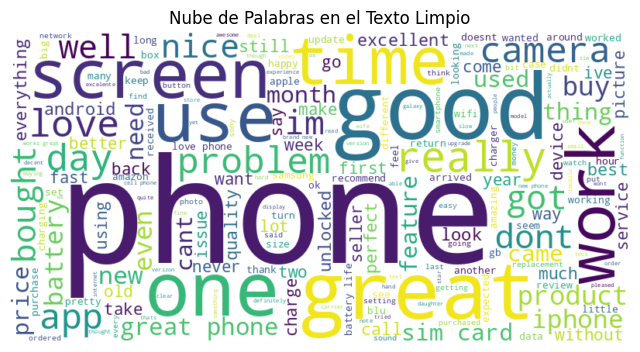

In [73]:
from wordcloud import WordCloud

# Unir todo el texto limpio en una sola cadena
texto_completo = ' '.join(datos_muestra['texto_limpio'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Graficar la nube de palabras
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('Nube de Palabras en el Texto Limpio')
plt.show()

**Análisis de la nube de palabras:**
- Podemos ver que las palabras que más se repiten es phone, good, great, love. Denotando la buena experiencia que tienen las personas al momento de comprar en la plataforma.
- Otras palabras como problem, time, day, bought, unlock. Puden estar relacionados con porblemas en los tiempo de entrega de la compra y si el dispositivo está bloqueado o no.

## Segundo Punto:
Análisis exploratorio de los datos: Realizar una exploración sobre los datos, utilizando
gráficos, estadísticos de resumen apropiados que den información relevante con el
problema o una descripción detallada de los datos que se tienen. Con su respectiva
descripción.

In [74]:
#Se crea una columna con la etiqueta del análisis de sentimiento

sia = SentimentIntensityAnalyzer()

#Función para obtener la etiqeuta del sentimiento
def obtener_sentimiento(texto):
  scores = sia.polarity_scores(texto)['compound']
  if scores > 0:
    return 'positivo'
  elif scores < 0:
    return 'negativo'
  else:
    return 'neutral'

#Crea la columna con la etiqueta de sentimiento
datos_muestra['sentimiento'] = datos_muestra['Reviews'].apply(obtener_sentimiento)

<Axes: xlabel='sentimiento', ylabel='count'>

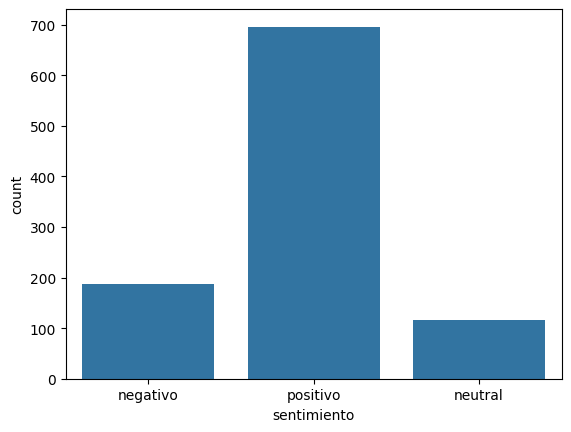

In [75]:
sns.countplot(x="sentimiento", data=datos_muestra)

In [76]:
datos_muestra["sentimiento"].value_counts(normalize=True)

,proportion
sentimiento,
positivo,0.696
negativo,0.187
neutral,0.117


**Análsis del gráfico:**

- Visualizando los graficos podemos ver que la mayoria de los reviews son positivos con un porcentaje del 69%.
- Los sentimientos negativos y neutrales tienen una distribución similar de 18% para el negativo y de 11% para el neutral.
- De lo que podemos notar que en su mayoría las personas tienen una perpectiva positiva al momento de comprar en Amazon.

In [77]:
#Se proceden a sacar las entidades
nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  Por cada noticia vamos a extraer la entidad de ORG, GPE y PERSON, PRODUCT
  Retorna un texto con las entidades separadas por ,
  """
  doc = nlp(texto) # aplicamos el algoritmo
  entidades=[] # entidades
  # entidades=[w.text for w in doc.ents if w.label_  in ["PRODUCT", "PERSON", "ORG", "GPE"]]
  for ent in doc.ents:
    if ent.label_  in ["PRODUCT", "PERSON", "ORG", "GPE"]:
      entidades.append(ent.text) # añadimos a la lista
  entidades=','.join(entidades) # unimos la lista por comas
  entidades=entidades.lower() # todo a minúsculas
  return entidades

In [78]:
datos_muestra["entidades"] = datos_muestra["texto_limpio"].apply(extraer_entidades)

In [79]:
datos_muestra["entidades"] = datos_muestra["texto_limpio"].apply(extraer_entidades)
join_text = ",".join(datos_muestra["entidades"])
pd.Series(join_text.split(",")).value_counts().iloc[0:20]

,count
,867
samsung,35
sony,23
android,12
gsm,10
microsoft,8
venezuela,7
xperia,6
apps,6
nokia,6


<Axes: xlabel='count', ylabel='entidades'>

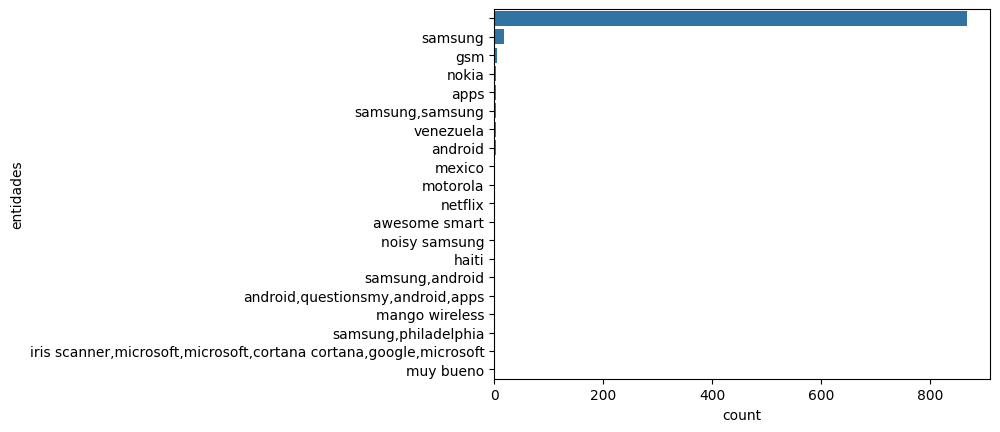

In [80]:
sns.countplot(y="entidades", data=datos_muestra, order=datos_muestra["entidades"].value_counts().iloc[0:20].index)

**Análisis de las entidades:**
- Podemos ver que por ser el espacio en blanco el más veces sale, se refiere a que hay pocas entidades en los comentarios.
- Vemos que en su mayoría compran dispositivos Samsung.
- Por lo que podemos ver, parece ser que en su mayoría, el país al que más se envían dispositivos es a Venezuela y México.

## Tercer Punto:

Elección e implementación de técnicas:

a. Elegir las técnicas de aprendizaje no supervisado adecuadas (clustering,
reducción de dimensionalidad, análisis de sentimientos, detección de
anomalías) que se relacionen con los datos y la problemática.

b. Establecer un criterio de evaluación para solucionar el problema con las
técnicas utilizadas.

c. Se debe dar una justificación y análisis sobre las técnicas utilizadas.

In [81]:
#Gráfico interactivo entre el precio y el sentimiento
import plotly.express as px
px.barplt(datos_muestra, y="Price", color='sentimiento' )

**Análisis del gráfico:**
- Hay comentarios positivos a pesar de que el precio sea más alto, teniendo de media un precio de 156,97 dolares.
- Los comentarios negativos tienen de media un precio más bajo, por lo que se puede suponer que al tener un menor precio, podrían ser de productos más baratos, lo que presentaron una mayor cantidad de fallas en su cálidad.
- Los neutros son el punto medio del precio de los comentarios positivos y negativos, probablemente los clientes que hicieron las reviews no vieron nada que resaltar del producto.

In [82]:
#Gráfico entre sentimiento y rating
px.box(datos_muestra, y="Rating", color='sentimiento' )

**Análisis del gráfico:**
- La relación rating con el sentimiento, está muy alineada. Ya que, los puntajes más bajos están relacionados con el sentimiento negativo, los puntajes más altos con el positivo y los neutrales son puntajes entre 2 y 5.

<Figure size 1200x800 with 0 Axes>

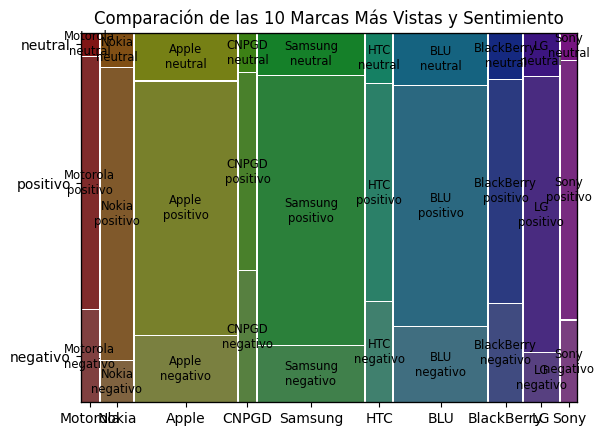

In [84]:
from statsmodels.graphics.mosaicplot import mosaic
# Filtrar las 10 marcas más frecuentes
top_10_brands = datos_muestra['Brand Name'].value_counts().nlargest(10).index
filtered_data = datos_muestra[datos_muestra['Brand Name'].isin(top_10_brands)]

# Crear el gráfico de mosaico para las 10 marcas más vistas
plt.figure(figsize=(12, 8))
mosaic(filtered_data, ['Brand Name', 'sentimiento'], title="Comparación de las 10 Marcas Más Vistas y Sentimiento")
plt.show()

**Análisis del mosaico:**
- Las marcas que tienen una mayor proporción son Apple, Samsung y Blue. Además, de que su bloque positivo es el de los más altos, denotando así, la satisfacción que tienen los clientes con las marcas.
- Las marcas que tuvieron más mensajes negativos fueron CNPGD, HTC y BlackBerry, esto demuestra la insaficción de los compradores con los dispositivos. De igual manera, la proporción de comentarios positivos sigue siento mucho mayor a los negativos, lo que pueden ser los comentarios negativos, problemas muy específicos con el producto.

## Cuarta Punto:
- **¿Cuál es la solución a la problemática?**

Según nuestro estudio, los compradores en Amazon tienen una respuesta positiva al momento de comprar Apple, Samsung y Blu.

El sentimiento que más tiene las personas el momento de comprar es Amazon es positivo, lo que denota la safiscción del cliente y la confiabilidad que se puede tener en la plataforma.

- **¿Qué limitaciones tiene la solución?**

Muchos de los compradores no realizan un review, sino que solo realizan el rating y muchas veces el tener un rating no está directamente relacionado con el sentimiendo de compra. Los consumidores pueden estar satisfechos con el producto que les llevo pero no necesariamente cumple con sus expectativas.

- **Recomendaciones para trabajos futuros.**

Utiliizar otras plataformas de compras en línea con respecto a la perspectiva del consumidor.

Por parte de la empresa Amazon, tomar en cuenta los comentarios negativos, para así, mejorar las exigencias del comprador. En este caso, los comentarios negativos están relacionados con los tiempos de entrega, esto puede ayudar a Amazon a ser mucho más eficiente en su cadena de distribución.